**What's new:**

* I excluded solution [7] since it is not in the same scale as the other submissions. Probably using MinMax scaler will be a good idea next time. The weight was redistributed to the solutions [1] - [4].

**Main idea:**
* Solution [5] still remains the most weighted/valubale for the scoring.

In [1]:
# inspired by [0]
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()
from datetime import datetime
import os
print(os.listdir("../input/"))
from sklearn.preprocessing import StandardScaler

['90-lines-solution-0-901-fast', 'santander-augment-to-the-rescue', 's3v32-ashish-gupta-eda-pca-scaler-lgbm', 's7v19-subham-sharma-what-is-next-in-santander', 'eda-pca-lgbm-santander-transactions', 'santander-magic-lgb-0-901', 'lightgbm-with-data-augmentation', 'lgbm-training-augmentation', 'eda-pca-simple-lgbm-on-kfold-technique', 'lgb-2-leaves-augment', 'santander-customer-transaction-prediction', 's1v8-nanashi-90-lines-solution-0901-fast']


In [2]:
# inspired by [...]
s1=pd.read_csv('../input/s1v8-nanashi-90-lines-solution-0901-fast/s1-v8.csv')['target']#[1]
s2=pd.read_csv('../input/santander-magic-lgb-0-901/submission.csv')['target']#[2]
s3=pd.read_csv('../input/s3v32-ashish-gupta-eda-pca-scaler-lgbm/s3-v32.csv')['target']#[3]
s4=pd.read_csv('../input/eda-pca-simple-lgbm-on-kfold-technique/submission26.csv')['target']#[4]
s5=pd.read_csv('../input/lgb-2-leaves-augment/lgb_submission.csv')['target']#[5]
s6=pd.read_csv('../input/lightgbm-with-data-augmentation/2019-03-20_15_43_sub.csv')['target']#[6]
#s7=pd.read_csv('../input/s7v19-subham-sharma-what-is-next-in-santander/s7-v19.csv')['target']#[7]

submission = pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')

solutions_set = pd.DataFrame({'s1': s1, 's2': s2, 's3': s3, 's4': s4, 's5': s5, 's6': s6})

# Submissions analysis

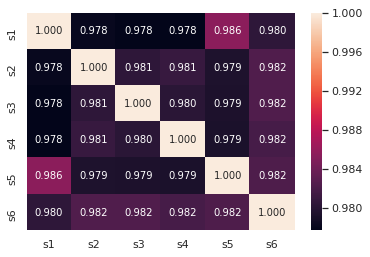

In [3]:
# since we use AUC, and distribution of the probability is not Normal, Kendal correlation is more appropriate
kendall = solutions_set.corr(method = 'kendall')
sns.heatmap(kendall, annot = True, fmt = ".3f")

# Submission

In [4]:
# Simple blender
submission['target'] = 0.15*s1 + 0.15*s2 + 0.15*s3 + 0.15*s4 + 0.3*s5 + 0.1*s6

filename="blended_submission_{:%Y-%m-%d_%H_%M}.csv".format(datetime.now())
submission.to_csv(filename, index=False)

# Inspired by:

[0] [Nanashi (#210), "Simple blend (my best score)"](https://www.kaggle.com/jesucristo/simple-blend-my-best-score)

[1] [Nanashi (#210), "90 lines solution 0.901 #Fast": V8](https://www.kaggle.com/jesucristo/90-lines-solution-0-901-fast?scriptVersionId=11837989). Dataset: s1-v8

[2] [Nanashi (#210), "Santander Magic LGB 0.901": V21](https://www.kaggle.com/jesucristo/santander-magic-lgb-0-901?scriptVersionId=11960403). Dataset: original (current version of kernel)

[3] [Ashish Gupta (#205), "EDA, PCA + LGBM : Santander Transactions": V32](https://www.kaggle.com/roydatascience/eda-pca-lgbm-santander-transactions?scriptVersionId=11798375). Dataset: s3-v32

[4] [Ashish Gupta (#205), "EDA, PCA + Simple LGBM on KFold Technique"](https://www.kaggle.com/roydatascience/eda-pca-simple-lgbm-on-kfold-technique). Dataset: original (current version of kernel)

[5] [Jiwei Liu (#28), "LGB 2 leaves + augment"](https://www.kaggle.com/jiweiliu/lgb-2-leaves-augment). Dataset: original (current version of kernel)

[6] [Ole Morten Grodås (#603), "Lightgbm with data augmentation"](https://www.kaggle.com/omgrodas/lightgbm-with-data-augmentation). Dataset: original (current version of kernel)

[7] [Subham Sharma (#1813, "Santander (-: Augment to the rescue": V19](https://www.kaggle.com/subhamsharma96/santander-augment-to-the-rescue?scriptVersionId=11821134). Dataset: s7-v19